Osnabrück University - Computer Vision (Winter Term 2016/17) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 01: Basic Operations - Convolution

## Introduction

This is a part of the first exercise sheet, you will find the rest in the `*.ipynb` file. The homework sheets will usually be available on Tuesdays and are supposed to be solved in groups of three. They have to be handed in before Monday morning of the following week. The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass $N-2$ of the weekly provided exercise sheets.

Sign up for a group on Stud.IP (See `Participants` -> `Functions/Groups`). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something. 

Your group will have a group folder in Stud.IP under `Documents`. Upload your solutions there to hand them in.

All exercise sheets will use [Jupyter Notebooks](http://jupyter-notebook.readthedocs.org/en/latest/notebook.html). To be able to run these on your system, you will need to install Python and a few packages. We suggest you to use the latest version of Python 3. In case you are not familiar with it, follow the directives below ([Assignment -1a)](#a%29-Install-Python)) to get it up and running. [Assignment -1b)](#b%29-Run-Jupyter-Notebooks) on this sheet will provide details on how to run the notebooks with Jupyter.

This week's sheet should be solved and handed in before the end of **Sunday, November 13, 2016**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

We will offer an open help session if you need help with installing and getting things to run: On **Wednesday, November 9, 2016 between 14:00 and 17:00** you will find some tutors in **93/E42** who try to help you.

## Assignment -1: Setup your homework environment [0 Points]

Thie exercise gives you no points, but it is required to do the other exercises. If you have problems, do not hesitate to contact us.


### a) Install Python

To be able to run Jupyter Notebooks you will need Python. Follow this exercise to get everything up and running.

#### UNIX (e.g. Ubuntu)

The following commands will install Python and the components required to build some of the packages we will use.

```sh
sudo apt-get install build-essential python3-dev python3
pip3 install --upgrade pip
pip3 install jupyter numpy scipy matplotlib pillow
```

#### MacOS

We recommend using homebrew to install Python.

```sh
ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
brew install python3
pip3 install --upgrade pip
pip3 install jupyter numpy scipy matplotlib pilow
```

#### Windows

Go to [https://www.python.org/downloads/windows/](https://www.python.org/downloads/windows/) and download the _Latest Python 3 Release_. Install it and make sure that _Add to PATH_ is checked during the installation.

Open your command line (`START` → `cmd.exe`). Type the following commands:

```sh
pip install --upgrade pip
pip install jupyter numpy scipy matplotlib pillow
```

If some of those installations fail, check if `pip` produces output. Otherwise `'pip' is not recognized as an internal or external command, operable program or batch file.`. If that is the case, rerun the installation and check "Add to PATH" or try restarting your computer. In the other cases it might be you have problems with compiling the packages. Try to find them on [http://www.lfd.uci.edu/~gohlke/pythonlibs/](http://www.lfd.uci.edu/~gohlke/pythonlibs/), download them and install them with: 

```sh
pip install *.whl
```


### b) Run Jupyter Notebooks

After you installed Python and Jupyter verify you are able to run the notebook server by opening your command line, navigate to the directory where you downloaded the `sheet01.ipynb` to, e.g. `~/university/CV2016-17` or `C:\Users\Documents\University\CV2016-17` and run jupyter in that directory.

```sh
cd ~/university/CV2016-17
jupyter notebook
```

Usually a browser window should open up. If not, open your favorite webbrowser and navigate to [localhost:8888/tree](localhost:8888/tree). (In some browsers there is a small display bug with $\LaTeX $ output: After each equation there will be a trailing `|`. Affected is e.g. Google Chrome.)

You will be presented with a list of files, choose `sheet01.ipynb`: You are good to go now and can start working on your homework right away!

### c) Check your installation
Check that your installation succeeded and all required packages are available by executing the following cell (type <kbd>Ctrl</kbd>+<kbd>&#x23ce;</kbd>, on German keyboards <kbd>Strg</kbd>+<kbd>&#x23ce;</kbd>, or press the "run cell"-button at the toolbar above):

In [1]:
import importlib
assert importlib.util.find_spec('numpy') is not None , 'numpy not found'
assert importlib.util.find_spec('matplotlib') is not None, 'matplotlib not found'
assert importlib.util.find_spec('scipy') is not None , 'scipy not found'

### Remarks:

* If you experience any troubles, remember to step by at the help session on Wednesday, November 9, use the Stud.IP forum or send us an e-mail - we are always happy to help.
* In case you don't manage to install the required software on your computer, we can provide an installation that you can use in the CIP pool of the IKW. Contact the tutors.
* If you do not want to use Python to do the exercises, but prefer another programming language, you may ask the tutors if they are willing to support it. However, the practice sessions will focus on Python and will probably not include other languages.


## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary.
There will be a similar exercise on every sheet.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

Euclidean Space is a set of n-tuples (vectors) of real components, where the distance between two such point is given by the sqrt of their squared distance.

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?


**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

## Assignment 1: Twodimensional Convolution [8 Points]

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works.

# continous
Generally, convolution of a coninuous signal with a filter kernel (ususally a local function) is integrating over the product of signal and kernel where the integration is taken over the shift applied to the kernel function. This would be done for each point where the signal is defined. 

# discrete, images
For discrete images, convolution consists in pushing a kernel (a rectangular/square array in the discrete case) across an image and center it on each pixel separately, then compute the sum of the elementwise products between the kernel and the pixels it overlaps. The result ist assigned to the pixel the kernel is centered on.

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Prove your answers.

As is obvious in the discrete case, the operation is linear since $\sum k_{i,j} \cdot I^1_{i,j} + \sum k_{i,j} \cdot I^2_{i,j} = \sum k_{i,j} \cdot (I^1_{i,j} + I^2_{i,j})$. It is also homogeneous since it operates the same at any image location.

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

$(2m+1)(2n+1)MN$ if we assume we do something with the $m$ virtual Pixels to the left and right and the $n$ virtual Pixels at the top and bottom. If we convolve only wher the kernel fully overlaps the image, it would be $(2m+1)(2n+1)(M-2m)(N-2n)$.

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c)) and compare the results.

Separability refers to the property that the kernel can be split into a horizontal and vertical part which can be applied separately one after another. First, one could convolve rowwise with a row kernel and after that columnwise with a column kernel. If the result is identical to convolving with a 2d-Kernel, it is separable. The nice thing is that the quadratic effort of $(2m+1)(2n+1)$ per Pixel reduces to $(2m+1)+(2n+1)$ per Pixel. This is because each Pixel  gets updated with only $2m + 2n$ neighbours, not with the entire $2m\cdot2n$ surrounding area.

## Assignment 2: Applying Convolution [4 Points]

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.filters.convolve` to solve this task. Check the documentation to learn how to use this function. 
Then realize the following filters, describe their effect and possible applications.

### a) Box filter

In [2]:
from scipy.ndimage.filters import convolve
from scipy.ndimage.filters import gaussian_filter
from scipy import misc
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


image = misc.imread('./images/starship.png') / 255.
# a)
box_filter = np.ones((5,5))
image_box = convolve(image, box_filter, mode='constant', cval=0)


### b) Gaussian filter

You may try different filter sizes.

In [3]:
# b) we could manually create a filter, but we can also use scipy
gauss_filter = np.zeros((5,5))
gauss_filter[2,2] = 1 # use one 1-Pixel to convolve
gauss_filter = gaussian_filter(gauss_filter, sigma=2)
image_gauss = convolve(image, gauss_filter, mode='constant', cval=0)

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

In [4]:
# c) sobel
sobel_filter = np.array([ [0, -1, -2], [1, 0, -1], [2, 1, 0] ]) * 0.25
image_sobel = convolve(image, sobel_filter, mode='constant', cval=0)

### d) Laplace operator

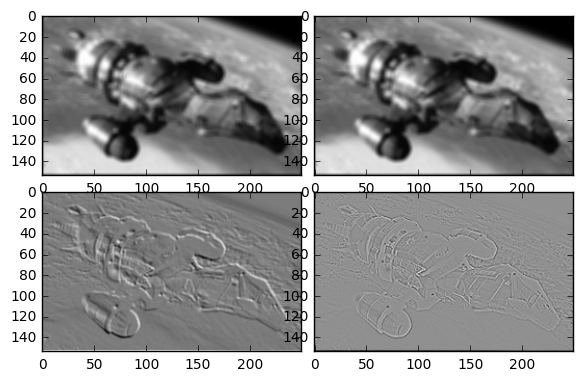

In [5]:
# d) laplace
laplace_filter = np.array([ [0, 1, 0], [1, -4, 1], [0, 1, 0] ])
image_laplace = convolve(image, laplace_filter, mode='constant', cval=0)

f, axarr = plt.subplots(2,2)
axarr = axarr.reshape(4)
f.tight_layout()
f.subplots_adjust(hspace=.05, wspace=.05)
axarr[0].imshow(image_box, cmap='gray')
axarr[1].imshow(image_gauss, cmap='gray')
axarr[2].imshow(image_sobel, cmap='gray')
axarr[3].imshow(image_laplace, cmap='gray')
plt.show()


## Assignment 3: Implementing Convolution [8 Points]

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel a argument and return an image of the same size, containing the result of convolving the image with the kernel.

You may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them.

Then apply your function with different kernels. Compare the results with [Assignment 2](#Assignment-2:-Applying-Convolution-[4-Points]).

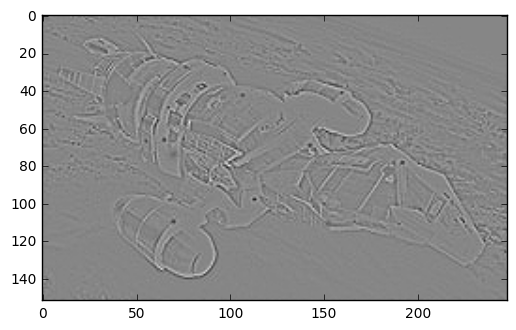

In [6]:
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np

def my_convolve2d(img, kern):
    """Convolve an image with a kernel.

    img -- the image, provided as a two-dimensional array
    kern -- the kernel, also a two-dimensional array
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Compute the convolution
    # Could do this with for-loops as well. We simply ignore all pixels whose
    # neighbourhood does not fully overlap the kernel. Result image will thus
    # be smaller
    # What is happening? For each row_index k except the mh top and bottom ones,
    # for each col_index l except the nh left and right ones, select the pixel's
    # neighbourhood (k-mh to k+mh horizontal, l-nh to l+nh vertical) and compute
    # elementwise product with kernel, then it up. That's the new value for that
    # pixel. result is then a list where the rows of the image are appended one
    # after another. We can simply reshape the list.
    result = [np.sum(kern * image[k-mh:k+mh+1,l-nh:l+nh+1]) for k in range(mh,M-nh) for l in
            range(nh,N-nh)]
    result = np.reshape(result, (M-2*mh, N-2*nh))

    return result

# Apply your function to an image:
# Try different filters, compare the results with Assignment 2

# Load the image
image = misc.imread('./images/starship.png', 'F')

box_3           = 1/9 * np.asarray([[1,1,1],[1,1,1],[1,1,1]])
laplace_3       = np.asarray([[0,1,0],[1,-4,1],[0,1,0]])
filtered_image  = my_convolve2d(image, box_3)
filtered_image2 = my_convolve2d(image, laplace_3)

plt.figure()
plt.imshow(filtered_image2, cmap = plt.get_cmap('gray'))
plt.show()
